In [1]:
import codeEF as EF
import codeBR as BR 
import codemesh as MESH
import matplotlib.pyplot as plt
import numpy as np

### Affichage de $\Omega$

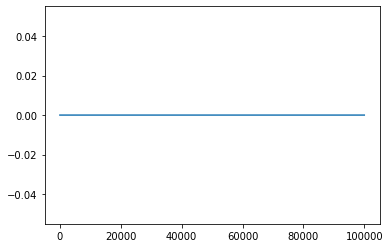

In [3]:
val_spe = [ 0.,0.19, 0.21,0.39,0.41,0.59,0.61,0.79,0.81,1.]


Nel  =  100000
h = 1/Nel
m = np.arange(0,1,h)
nodes = np.array(list(m) + [1])

Omega2 = []
Omega1 = []
val = 0
for i in nodes :
    if (i==0.19 or i==0.21) or (i==0.39 or i==0.41) or (i==0.59 or i==0.61) or (i==0.79 or i==0.81) :
        Omega2.append(val)
    else:
        Omega1.append(val)

plt.plot(Omega1)
plt.plot(Omega2)

### Affichage des fonctions de bases 

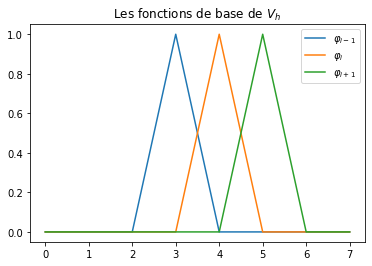

In [2]:
# affichage des fonctions de bases 

def fct_base(nodes,x_imoins1,x_i,x_iplus1,h):
    f = []
    for x in nodes :
        val = ((x-x_imoins1)/h)*((x >= x_imoins1) and (x < x_i)) + (-(x-x_iplus1)/h)*((x > x_i) and (x <= x_iplus1)) + (1)*(x == x_i)
        f.append(val)
    return f



a,b,h = 0,1,0.01
nodes = np.arange(a,b,h)

# ph_i
i = 20
x_imoins1,x_i,x_iplus1 = nodes[i-1],nodes[i],nodes[i+1]
ph_i = fct_base(nodes,x_imoins1,x_i,x_iplus1,h)

# ph_i-1
imoins1 = i-1
x_imoins1,x_i,x_iplus1 = nodes[imoins1-1],nodes[imoins1],nodes[imoins1+1]
ph_imoins1 = fct_base(nodes,x_imoins1,x_i,x_iplus1,h)

# ph_i+1
iplus1 = i+1
x_imoins1,x_i,x_iplus1 = nodes[iplus1-1],nodes[iplus1],nodes[iplus1+1]
ph_iplus1 = fct_base(nodes,x_imoins1,x_i,x_iplus1,h)



# on affiche les ph_i
scale = 4
plt.plot(ph_imoins1[i-scale:i+scale],label = r'$\varphi_{i-1}$')
plt.plot(ph_i[i-scale:i+scale],label = r'$\varphi_{i}$')
plt.plot(ph_iplus1[i-scale:i+scale],label = r'$\varphi_{i+1}$')
plt.legend(loc='best')
plt.title("Les fonctions de base de $V_h$ ")
plt.show()


### Test mesh 

In [2]:
N = 500
Nel  =  N - 1 #N 
h = 1/Nel
m = np.arange(0,1,h)
if (len(m) == N ):
        # pas d'ajout de 1 
    Nel = np.size(m)
else :
    nodes = np.array(list(m) + [1]) #ajout de 1 
    Nel = np.size(nodes)

print(Nel,len(m))


500 500


In [6]:
N = 10
mh = MESH.mesh(N)
# print("nodes : ", mh.nodes)
# print("len(nodes) : ", len(mh.nodes))
# print("h : ", mh.h)

# print(" id_Omega1 : ", mh.id_Omega1)
# print(" id_Omega2 : ", mh. id_Omega2 )


### Test EF 

In [7]:
# Maillage omega
Nel = 1000
mh = MESH.mesh(Nel)


# Assemblage matrix
femP1 = EF.fem(mh)

A_1,A_2,M ,b = femP1.assemble_matrix()
A_1,A_2,M ,b = A_1.toarray(),A_2.toarray(),M.toarray() ,b

# plt.spy(A_1, precision=0.000001, markersize = 2)
# plt.title("Visualisation de $A_1$, avec N = " + str(Nel))
# plt.show()


# plt.spy(A_2, precision=0.00001, markersize = 2)
# plt.title("Visualisation de $A_2$, avec N = " + str(Nel))
# plt.show()


# plt.spy(M, markersize = 2)
# plt.title("Visualisation de $M$, avec N = " + str(Nel))
# plt.show()



# # Resolutions


# solexacte = EF.solexacte
# mu = 1
# uef = femP1.U(mu)
# uef = femP1.solve(mu,solexacte)

l,k : (0, 999)


### Etude de convergence

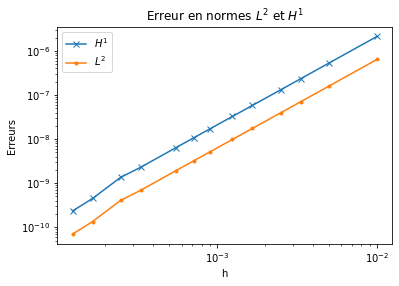

pente H1 =  2.003852427535111
pente L2 =  2.003862266892234


In [4]:
Liste_n = [100,200,300,400,600,800,1100,1400,1800,3000,4000,6000,8000,10000]

H = [1/i for i in Liste_n]

mu = 1
L_normL2  , L_normeH1 = EF.genere_norme(Liste_n,mu)

EF.plot_norme(H,L_normL2  , L_normeH1)
EF.print_pente(H,L_normL2  , L_normeH1)

In [2]:
# calcul de uex en fonction de nmax
# Maillage omega
nmax = 10000
mh = MESH.mesh(nmax)
nodes = mh.nodes

# calcul de uex 
uex = EF.solexacte(nodes)

In [3]:
# gener sol EF et leur nodes
Liste_n = [100,200,300,400,600,800,1000,2000,3000,4000,6000,8000,nmax]
H = [1/i for i in Liste_n]
mu = 1

Liste_m , Liste_uapp = EF.genere_uapp(Liste_n,mu)


# interpolation des sol EF
U_h = EF.genere_uappinterp(Liste_m ,Liste_uapp,nodes)

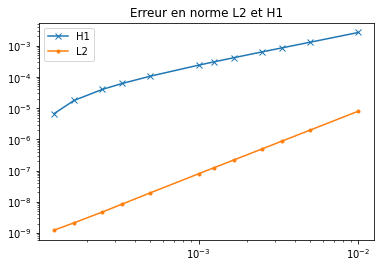

pente H1 =  1.1429643962176588
pente L2 =  2.0207896327603576


In [4]:
# Maillage omega
mh = MESH.mesh(nmax)
Liste_m.append(mh.nodes)


# Assemblage matrix
femP1 = EF.fem(mh)
A_1,A_2,M ,b = femP1.assemble_matrix()

N = A_1 + mu*A_2

L_normL2  , L_normeH1 = EF.norm_P1(uex, U_h,M,N)

EF.plot_norme(H,L_normL2  , L_normeH1)
EF.print_pente(H,L_normL2  , L_normeH1)